# <center> Guia 4 </center>
Alumnes: Borrel Trinidad, Brusco Agustín

Docentes: Rodriguez Imazio Paola, Amette Estrada Julian

## Imports Generales
Ejecutar la siguiente celda para poder correr el código del Notebook.

In [1]:
import sys
import os
# Colab Set-Up
if ("google.colab" in sys.modules) and (os.getcwd() == '/content'):
    print(
        "Ejecutando en Google Colab\n"
        "Para correr el notebook se necesita clonar un repositorio con funciones "
        "auxiliares e instalar librerías."
    )
    if input(
        "¿Desea clonar el repositorio e instalar los paquetes necesarios?"
        "[y/n]:"
    ).lower() == "y":
        os.system("git clone https://github.com/agustinbrusco/Sistemas_Complejos.git")
        print(
            "Se clonó https://github.com/agustinbrusco/Sistemas_Complejos.git."
        )
        os.chdir("Sistemas_Complejos/guias/")
        %pip install findiff
        %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

# Imports Generales
from typing import Callable
import numpy as np
from numpy.typing import ArrayLike
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Matplotlib settings
%config InlineBackend.figure_format = "retina"  # For high dpi figures in notebook
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["figure.dpi"] = 120
plt.rcParams["legend.fontsize"] = "medium"
plt.rcParams["axes.labelsize"] = "large"

from utils import (plot_3d_evolution)

# Ecuación Korteweg-de-Vries(KdV)

La ecuación KdV es una ecuación diferencial en derivadas parciales que sirve como modelo de, entre otras cosas, aguas poco profundas. Fue por primera vez introducida por Boussinesq en 1877 como una nota y redescubierta por Diederik Korteweg y Gustav de Vries en 1895. Esta está dada por la expresión,

$$ \partial_t u + u u_x + \beta \, u_{xxx} = 0 $$



$\bf a)$ Pruebe analíticamente la conservación del momento $P = \int u dx$ y  de la energía $E = \int u^2 dx$.

$\bf b)$ Notando que el estado estacionario es con $u$ constante, calcule la relación de dispersión de ondas linealizando. ¿Qué tipo de ondas son las que encuentra?  


$\bf c)$ Busque la solución de ondas viajeras $u(x-vt) = u (y)$. Para eso, primero note que $u_t = -v u_t$. Escriba el sistema como una ecuación de segundo orden integrando (Note que la presencia de una simetría $v \rightarrow v + w$ y $u \rightarrow u + w$ antes de integrar permite anular la constante de integración), realice una analogía con una ecuación del movimiento como las que conoce de mecánica newtoniana ($\ddot{x} = - \frac{dV}{dx}$, interprete el tiempo como $x$ y el espacio como $u$) e interprete (grafique el potencial para hacerlo). Discuta la existencia de un único soliton y de un trén de solitones.

$\bf d)$ Escriba un integrador con método pseudoespectral para la ecuación KdV usando Runge-Kutta de orden 2 midpoint para el paso temporal. Hágalo en un recinto de tamaño $2  \ pi$ con condiciones de contorno periódicas y $N = 128$ puntos de grilla. Note que el término $\beta u_{xxx}$, en caso ser dominante exige $dt < \frac{\Delta x^3}{\beta}$. (puede usar un N mayor cuidando el dt para que se cumpla la condición de estabilidad)

$\bf e)$ Sabiendo que la expresión de un solitón está dada por:

$$ u(x,t) = 3 \, v \, \text{cosh}^{-2} \left[ \sqrt{\frac{v}{4 \beta}} (x  - v t) \right]$$

coloque un solitón como condición inicial, calcule su velocidad en función del tiempo y compare con lo que espera. Escriba una condición de dos solitones, uno rápido y uno lento. ¿Se afectan el uno al otro?

$\bf f)$ Del método de scattering inverso se encuentra que usando la transformación

$$ u  = - 6 \beta \left( \lambda + \frac{\psi_{xx}}{\psi}\right)$$

entonces $u$ será una solución de KdV si $\psi$ es solución de la ecuación de Schrödinger con un potencial $V = \frac{-u}{6 \beta}$. Dado el potencial, los lugares donde hayan pozos representan la existencia de estados ligados y resultarán en la emisión de solitones.

Elija una condición inicial, grafique el potencial y vea cómo se emiten solitones desde la zona esperada. Chequee las cantidades conservadas del comienzo.


(Sugerencia: Use $\beta = 0.022$ y $dt = 5e-5$ e integre por tiempo muy largos)

## a)

Si consideramos que $u u_x = \partial_x \left(\frac{u^2}{2}\right)$ podemos reescribir el segundo término de KdV y esta última queda
$$\partial_t u + \partial_x \left(\frac{u^2}{2} + \beta u_{xx} \right) = 0,$$
entonces, si consideramos que en nuestro problema tenemos un fluido o gas en un tubo de longitud $L$, integrando espacialmente sobre todo el tubo tenemos que

$$ \frac{\mathrm{d}}{\mathrm{d}t} \int_0^L u\, \mathrm{d}x = - \int_0^L \frac{\partial}{\partial x} \left( \frac{u^2}{2} + \beta u_{xx} \right)\, \mathrm{d}x = \left[ \frac{u^2}{2} + \beta u_{xx} \right]_0^L$$
$$\Rightarrow \frac{\mathrm{d}}{\mathrm{d}t}P = 0 \iff u(0) = u(L) \wedge u_{xx}(0) = u_{xx}(L)$$
Así para condiciones de contorno periodicas en $u$ y $u_{xx}$ el momento se conserva globalmente en el recinto.

Por otro lado, para ver la conservación de la energía comenzamos multiplicando a toda la expresión por $u$ y además usando que  $u\partial_z u = \partial_z \left(\frac{u^2}{2}\right)$, entonces la expresión queda

$$ \partial_t \left(\frac{u^2}{2}\right) + u \partial_x \left(\frac{u^2}{2}\right) + u\beta u_{xxx} = 0$$

Notando que los primeros dos términos corresponden a la derivada convectiva, es decir $\mathrm{d}_t = \partial_t + u \partial_x$, entonces queda que

$$ \mathrm{d}_t \left(\frac{u^2}{2}\right) = - u\beta u_{xxx}$$

e integrando espacialmente a lo largo del tubo tenemos que

$$ \frac{\mathrm{d}}{\mathrm{d}t} \int_0^L \frac{u^2}{2}\, \mathrm{d}x = - \int_0^L u \beta u_{xxx}\, \mathrm{d}x $$
$$\Rightarrow \frac{\mathrm{d}}{\mathrm{d}t} \int_0^L \frac{u^2}{2}\, \mathrm{d}x = - \beta \left[ u u_{xx} |_0^{L} - \int_0^L \partial_x \left(\frac{u_x}{2} \right)^2\, \mathrm{d}x \right] =  - \beta \left[ u u_{xx}  - \left(\frac{u_x}{2} \right)^2 \right]_0^{L}$$
%$$\Rightarrow E = 0 \iff |u_x(0)| = |u_x(L)|$$

De esta manera, para que se conserve la energía alcanza con pedir las mismas condiciones de contorno que para la conservación de $P$ y además $|u_{x}(0)| = |u_{x} (L)|$.

## b)

Proponiendo una solución de tipo $u(x,t) = u_0 + \delta u(x,t) \to u = u_0 + \delta u$ y reemplazandola en KdV tenemos que

$$ \partial_t \delta u + (u_0 + \delta u) \partial_x \delta u + \beta \, \delta u_{xxx} = 0 $$

y quedandonos con términos $\mathcal{O} (\delta u)$ nos queda la siguiente expresión:

$$ \partial_t \delta u + u_0  \partial_x \delta u + \beta \, \delta u_{xxx} = 0.$$

Considerando ahora una solución de onda viajera $\delta u = \mathcal{C} e^{i(kx - \omega t)}$ y resolviendo para los coeficientes llegamos a la expresión de la relación de dispersión

$$ \omega = u_0 k - \beta k^3$$

donde el primer término se corresponde a una solución de ondas no dispersivas mientras que el segundo término se corresponde a una solución de ondas dispersivas.

Finalmente, podemos obtener la velocidad de propagación de ondas en este medio según
$$v = \frac{\omega}{k} = u_0 - \beta k^2,$$
y la velocidad de grupo según
$$v_\mathrm{grupo} = \frac{\mathrm{d}\omega}{\mathrm{d}k} = u_0 - 3 \beta k^2.$$


## c)

Si proponemos soluciones de onda viajera del tipo $u(x-vt) = u(y)$ las derivadas parciales quedan definidas en términos de la nueva variable $y$ según:

$$\partial_t u (x - vt) = -v u'(y) $$
$$\partial_x u (x - vt) = u'(y)$$

Usando estas equivalencias podemos reescribir KdV cómo:

$$ -vu'(y) + \frac{\mathrm{d}}{\mathrm{d}y}\left(\frac{u^2}{2}\right) + \beta \, u'''(y) = 0 $$
$$\iff  \frac{\mathrm{d}}{\mathrm{d}y}\left(-vu(y) + \frac{u^2(y)}{2}+ \beta \, u^{\prime \prime}\right)  = 0$$

e integrando tenemos que

$$ \beta u^{\prime \prime} = vu - \frac{u^2}{2} + \mathcal{C}$$
donde apareció una constante de integración $\mathcal{C}$ que podemos anular considerando la simetría $v \rightarrow v + w$ y $u \rightarrow u + w$ sobre la ecuación KdV. Aplicando esta simetría tenemos que
$$\begin{align*}
\beta u^{\prime \prime} = & (v + w)(u + w) - \frac{(u + w)^2}{2} + \mathcal{C} \\
\beta u^{\prime \prime} = & vu + wu + vw + w^2 - \frac{u^2}{2} - uw - \frac{w^2}{2} + \mathcal{C} \\
\beta u^{\prime \prime} = & vu - \frac{u^2}{2} + \left(vw + \frac{w^2}{2} + \mathcal{C}\right) \\
\end{align*}
$$
Así, eligiendo convenientemente el valor de $w$ puede anularse todo el parentesis y la constante de integración $\mathcal{C}$, quedandonos la siguiente expresión:

$$\beta u^{\prime \prime} = vu - \frac{u^2}{2} = - \frac{\mathrm{d}V}{\mathrm{d}u}$$
dónde $V = -v\frac{u^2}{2} + \frac{u^3}{6}$ es el potencial.

A continuación mostramos el potencial para distintos valores de $v$ y cómo variando la energía del sistema podemos obtener distintos tipos de soluciones de forma análoga a un problema de mecánica.

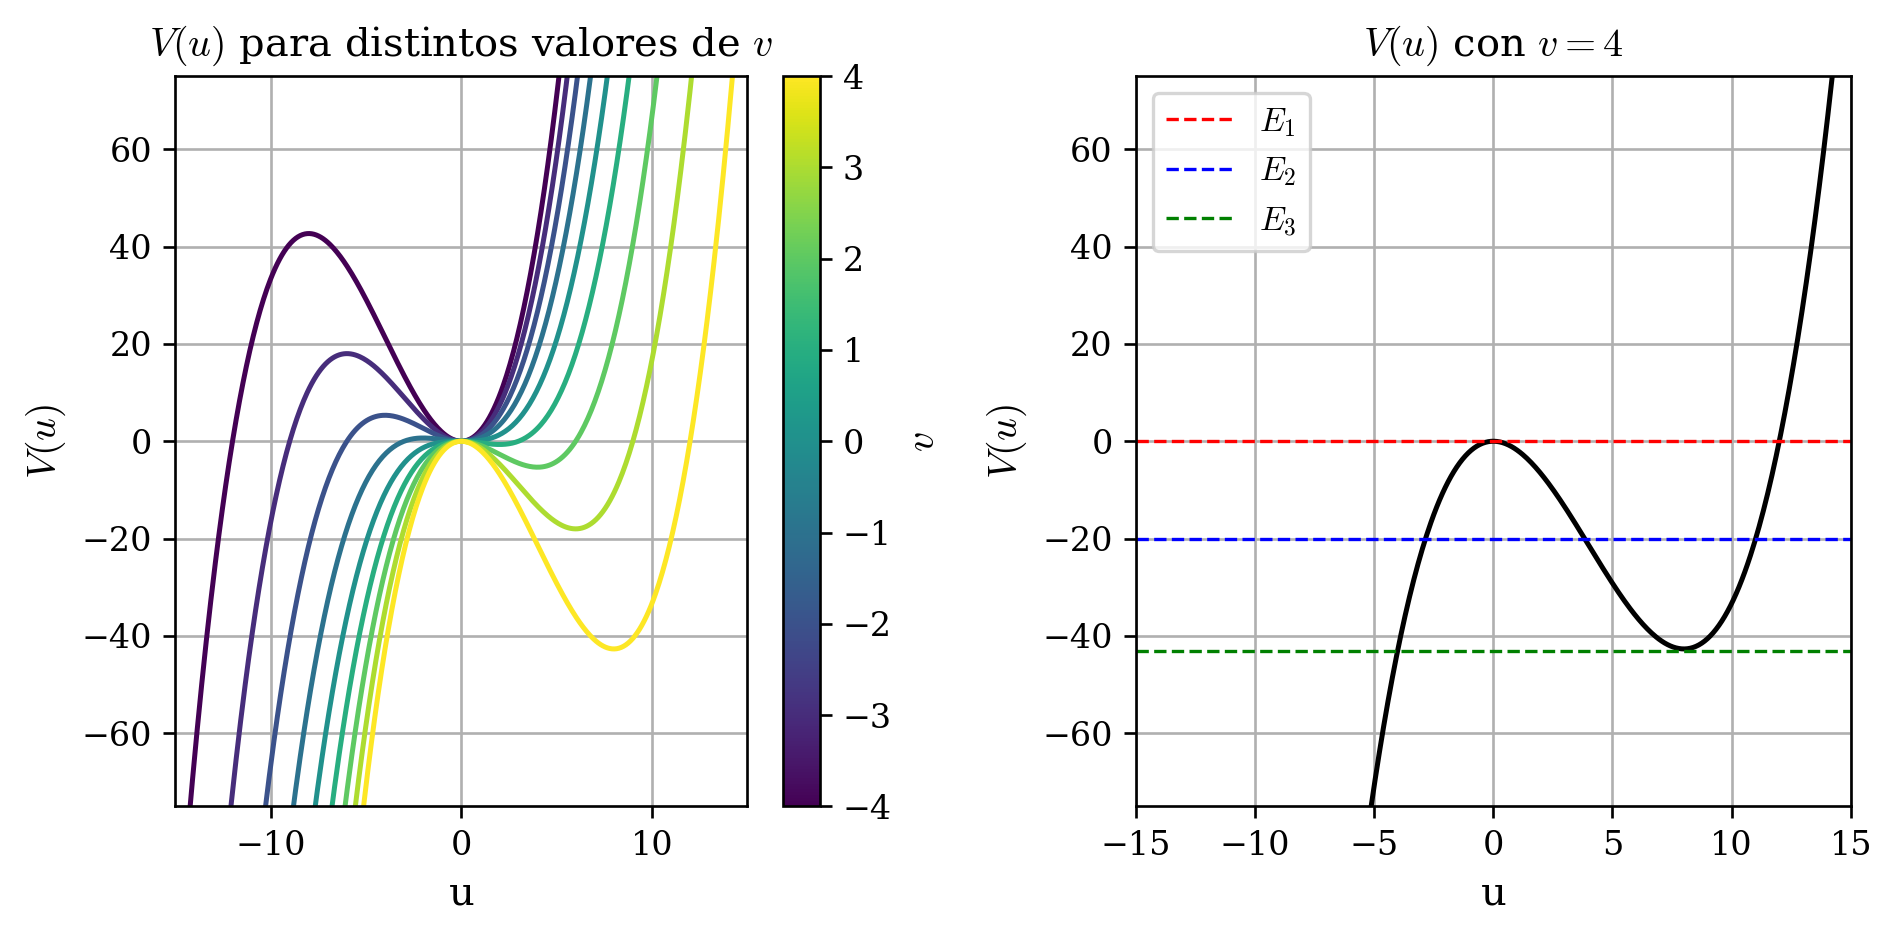

In [ ]:
def potencial_kdv(u: ArrayLike, v: float) -> ArrayLike:
    return -v * (u**2) / 2 + (u**3) / 6


u_vals = np.linspace(-15, 15, 500)
v_vals = np.arange(-4, 5, 1)
colors = plt.cm.ScalarMappable(
    norm=plt.Normalize(v_vals[0], v_vals[-1]),
    cmap="viridis",
)
fig, axs = plt.subplots(ncols=2, figsize=(8, 4), tight_layout=True)

for v in v_vals:
    axs[0].plot(u_vals, potencial_kdv(u_vals, v), c=colors.to_rgba(v), label=f"$v={v}$")
axs[0].set_title("$V(u)$ para distintos valores de $v$")
axs[0].grid(True)
axs[0].set_xlabel("u")
axs[0].set_ylabel("$V(u)$")
axs[0].set_xlim(u_vals[0], u_vals[-1])
axs[0].set_ylim(-75, 75)
plt.colorbar(colors, label="$v$", ax=axs[0])

axs[1].plot(u_vals, potencial_kdv(u_vals, 4), c="k")
axs[1].set_title("$V(u)$ con $v = 4$")
axs[1].grid(True)
axs[1].set_xlabel("u")
axs[1].set_ylabel("$V(u)$")
axs[1].axhline(y=0, ls="--", lw=1, color="red", label="$E_1$")
axs[1].axhline(y=-20, ls="--", lw=1, color="blue", label="$E_2$")
axs[1].axhline(y=-43, ls="--", lw=1, color="green", label="$E_3$")
axs[1].legend()
axs[1].set_xlim(u_vals[0], u_vals[-1])
axs[1].set_ylim(-75, 75)

plt.show()

Observando la figura a izquierda, donde se consideraron valores de $v$ enteros en el conjunto $[-4, 4],$ se concluye que siempre que $v \neq 0$ el potencial tendrá un valle con un mínimo y máximo locales bien definidos. Considerando la analogía con la mecánica newtoniana se interpreta que sistemas con energías entre el mínimo y máximo local presentan órbitas cerradas, mientras que sistemas con energía entre el máximo local y $+ \infty$ y entre $- \infty$ y el mínimo local se corresponden con órbitas abiertas. Estas últimas no tienen interpretación física ya que para obtener tales órbitas se necesitaría una energía infinita.

En la figura de la derecha pueden interpretarse las soluciones de órbitas cerradas en el contexto de KdV. Para $E_1$ se tiene que la energía será la correspondiente a la de un único soliton, donde en particular a esta órbita se la llama sepatariz, ya que es la que justamente separa las soluciones de órbitas cerradas de las abiertas. Para valores menores de energía, como $E_2$ se tiene que el sistema oscila, generandose trenes de solitones con una menor amplitud a la del único solitón mencionado anteriormente. Finalmente, para $E_3$ se tienen órbitas circulares, para las que se tienen $\infty$ solitones de amplitud tendiendo a $0$.

## d)

A continuación se muestra el código para resolver la ecuación KdV usando el método pseudoespectral con Runge-Kutta de orden 2 midpoint para el paso temporal.

In [6]:
def evol(u: ArrayLike, k: ArrayLike, beta: float, dt: float):
    """Evoluciona en el tiempo la PDE usando el método pseudoespectral y \
Runge-Kutta de segundo orden.
    """
    u_hat = np.fft.rfft(u)  # Transformamos al espacio de Fourier
    u_hat_inicial = u_hat  # Guardamos el estado inicial
    for ord in [2,1]:  # Bucle para el Runge-Kutta
        D = dt/ord
        u_ux_hat = compute_advection(u_hat, k)
        u_hat = u_hat_inicial + D*(-u_ux_hat + 1j*beta*(k**3)*u_hat)  # Integramos en el tiempo
        u_hat[int(u.size/3):] = 0  # Dealiasing (eliminemos modos espúreos!)
    u_nuevo = np.fft.irfft(u_hat)  # Vuelva del espacio de Fourier
    return u_nuevo

def compute_advection(u_hat, k):
    """Calcula u*ux usando el método pseudoespectral y devuelve el resultado \
en el espacio Fourier.
    """
    ux_hat = 1j*k*u_hat  # Derivamos
    u = np.fft.irfft(u_hat)
    ux = np.fft.irfft(ux_hat)
    u_ux_hat = np.fft.rfft(u * ux)
    return u_ux_hat

In [7]:
def kdv_pseudoespectral(
    u0: Callable[[ArrayLike], ArrayLike],
    beta: float = 0.022,
    tf: float = 5,
    nx: int = 128,
    L: float = 2 * np.pi,
    dt: float = 5e-5,
) -> tuple[ArrayLike, ArrayLike, ArrayLike]:
    # Defino mis puntos en el espacio real y los modos para el espacio de Fourier


    x_vals = np.linspace(0, L, nx, endpoint=False)  # Coordenada espacial en [0,2*pi)
    t_vals = np.arange(0, tf + dt/2, dt)  # Tiempo
    nt = t_vals.size
    # Números de onda ordenados como en la FFT
    k_vals = np.fft.rfftfreq(nx, d=(x_vals[1] - x_vals[0])) * 2 * np.pi

    # Grilla para plot
    u = np.empty([nx, nt])  # Array con la velocidad
    u[:, 0] = u0(x_vals)  # Condiciones iniciales

    # Aplico el método de Euler para la integración temporal
    for n in tqdm(range(nt - 1), desc="Pasos de Pseudo-Espectral"):
        u[:, n+1] = evol(u[:, n], k_vals, beta, dt)
    return x_vals, t_vals, u

## e)

In [4]:
def track_peaks(u: ArrayLike, **findpeakskwargs) -> tuple[ArrayLike, ArrayLike]:
    """Calcula los picos de la función `u` en el tiempo y devuelve sus coordenadas \
espacio-temporales. Si se encuentran múltiples picos en el tiempo inicial, se \
los trackea a lo largo de toda la evolución y se ignoran los intervalos en los \
que el número de picos hallado difiere del inicial.

    Parameters:
    -----------

        `u {ArrayLike}`: Solución de KdV con forma u(x, t).
    """
    peaks_x = list()
    peaks_t = list()
    for i, u_i in tqdm(enumerate(u.T), total=u.T.shape[0], desc="Buscando Picos"):
        peaks, _ = find_peaks(u_i, **findpeakskwargs)
        if (len(peaks_x) == 0) or (len(peaks) == len(peaks_x[-1])):
                peaks_x.append(x_vals[peaks])
                peaks_t.append(t_vals[i])
    peaks_x = np.array(peaks_x)
    peaks_t = np.array(peaks_t)
    return peaks_t, peaks_x

A continuación integramos la condición inicial
$$u(x, 0) = 3 v \cosh^{-2} \left[ \sqrt{\frac{v}{4 \beta}} (x  - x_0) \right]$$
dónde "corrimos" la posición inicial del pico del solitón a $x_0$ para minimizar los defectos asociados a la periodicidad forzada por el método de integración sobre los bordes.

Pasos de Pseudo-Espectral:   0%|          | 0/100000 [00:00<?, ?it/s]

Buscando Picos:   0%|          | 0/100001 [00:00<?, ?it/s]

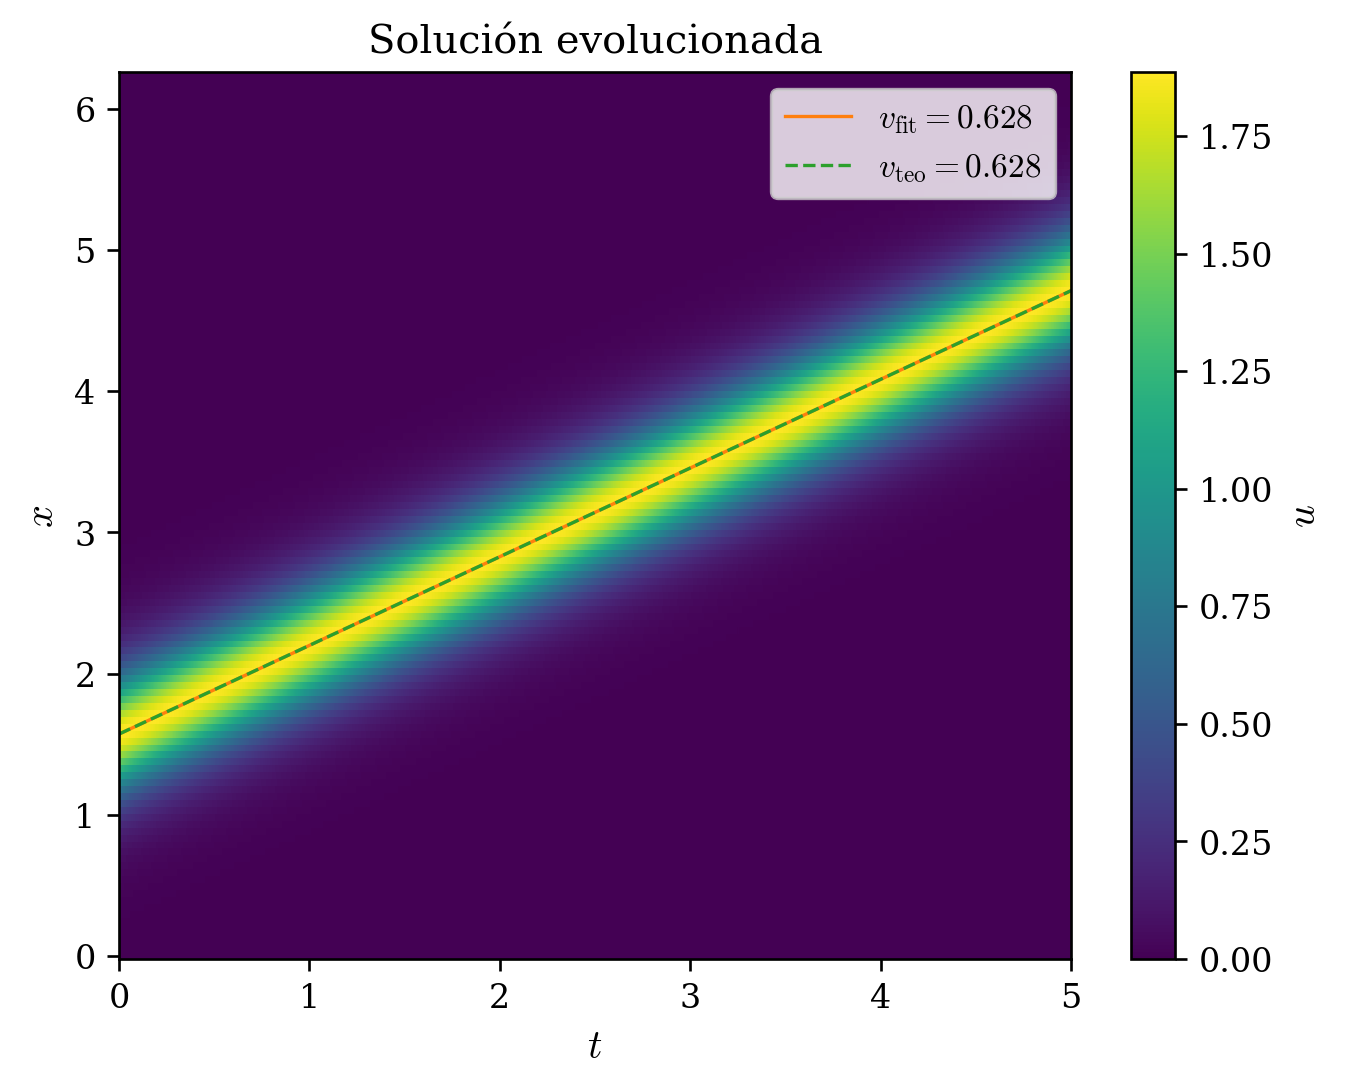

In [37]:
%matplotlib inline
tf = 5
L = 2 * np.pi
beta = 0.022
v = 0.5 * L / tf  # Velocidad de la onda en función del tamaño del recinto
x0 = L/4
x_vals, t_vals, u = kdv_pseudoespectral(
    lambda x: 3 * v * np.cosh(np.sqrt(v / (4 * beta)) * (x - x0))**(-2),
    beta=0.022,
    tf=tf,
    nx=128,
    L=L,
    dt=5e-5,
)

peaks_t, peaks_x = track_peaks(u, height=0.8)

plt.figure()
plt.title("Solución evolucionada")
xx_vals, tt_vals = np.meshgrid(x_vals, t_vals, indexing='ij')
plt.pcolormesh(tt_vals, xx_vals, u, cmap="viridis")

params, params_cov = curve_fit(lambda t, a, b: a*t + b, peaks_t, peaks_x.flatten())
plt.plot(t_vals, params[0]*t_vals + params[1], "C1-", lw=1,
         label=r"$v_\mathrm{fit}"+f"={params[0]:.3g}$")
plt.plot(t_vals, v*t_vals + x0, "C2--", lw=1, label=r"$v_\mathrm{teo}"+f"={v:.3g}$")

plt.legend()
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.colorbar(label="$u$")
plt.show()

Siguiendo la evolución de la posición del máximo en el tiempo calculamos la velocidad de propagación. Así pudimos observar que coincide con la velocidad de propagación esperada por la teoría (el valor de $v$ utilizado en la CI) en $8\times 10^{-5}$.

In [8]:
print(f"Δv = {v - params[0]:.3g}")

Δv = -8.85e-05


In [ ]:
## Otros gráficos auxiliares

# %matplotlib inline
# u_teo = 3 * v * np.cosh(np.sqrt(v / (4 * beta)) * (x_grid - x0 - v * t_grid))**(-2)
# u_teo = u_teo.T
# plt.figure()
# plt.pcolormesh(t_grid, x_grid, u_teo.T - u.T, shading="auto", cmap="viridis")
# plt.xlabel("$t$")
# plt.ylabel("$x$")
# plt.colorbar(label="$u_\mathrm{teo} - u_\mathrm{evol}$")
# plt.show()

# %matplotlib widget
# fig, ax, v_cmap = plot_3d_evolution(x_vals, t_vals, u, cmap_name="viridis")
# fig.set_label("Evolución de KdV mediante Método Pseudoespectral")
# fig.suptitle(r"$u(x, 0) = 3 v \cosh^{-2} \left[ \sqrt{\frac{v}{4 \beta}} (x  - L/2) \right]$")
# plt.show()

Ahora evolucionamos dos solitones con diferentes velocidades $v_1, v_2$ y posiciones iniciales $x_1, x_2$. Para este primer caso se eligieron velocidades tales nuestro método sea capaz de resolver los dos solitones en toda la evolución. En particular se consideró la siguiente relación: $v_1 = \frac{v_2}{2}$.

Pensando en la analogía con la mecánica newtoniana, se puede interpretar el encuentro entre solitones como un choque elástico dónde hay transferencia de momento. Abajo podemos ver que el solitón más rápido disminuye su pendiente luego del choque mientras que el solitón más lento percibe un efecto opuesto. Más aún hay un intercambio tambien en la amplitud de ambos solitones, entendiendose tambien como consecuencia del choque mencionado. 

Pasos de Pseudo-Espectral:   0%|          | 0/100000 [00:00<?, ?it/s]

Buscando Picos:   0%|          | 0/100001 [00:00<?, ?it/s]

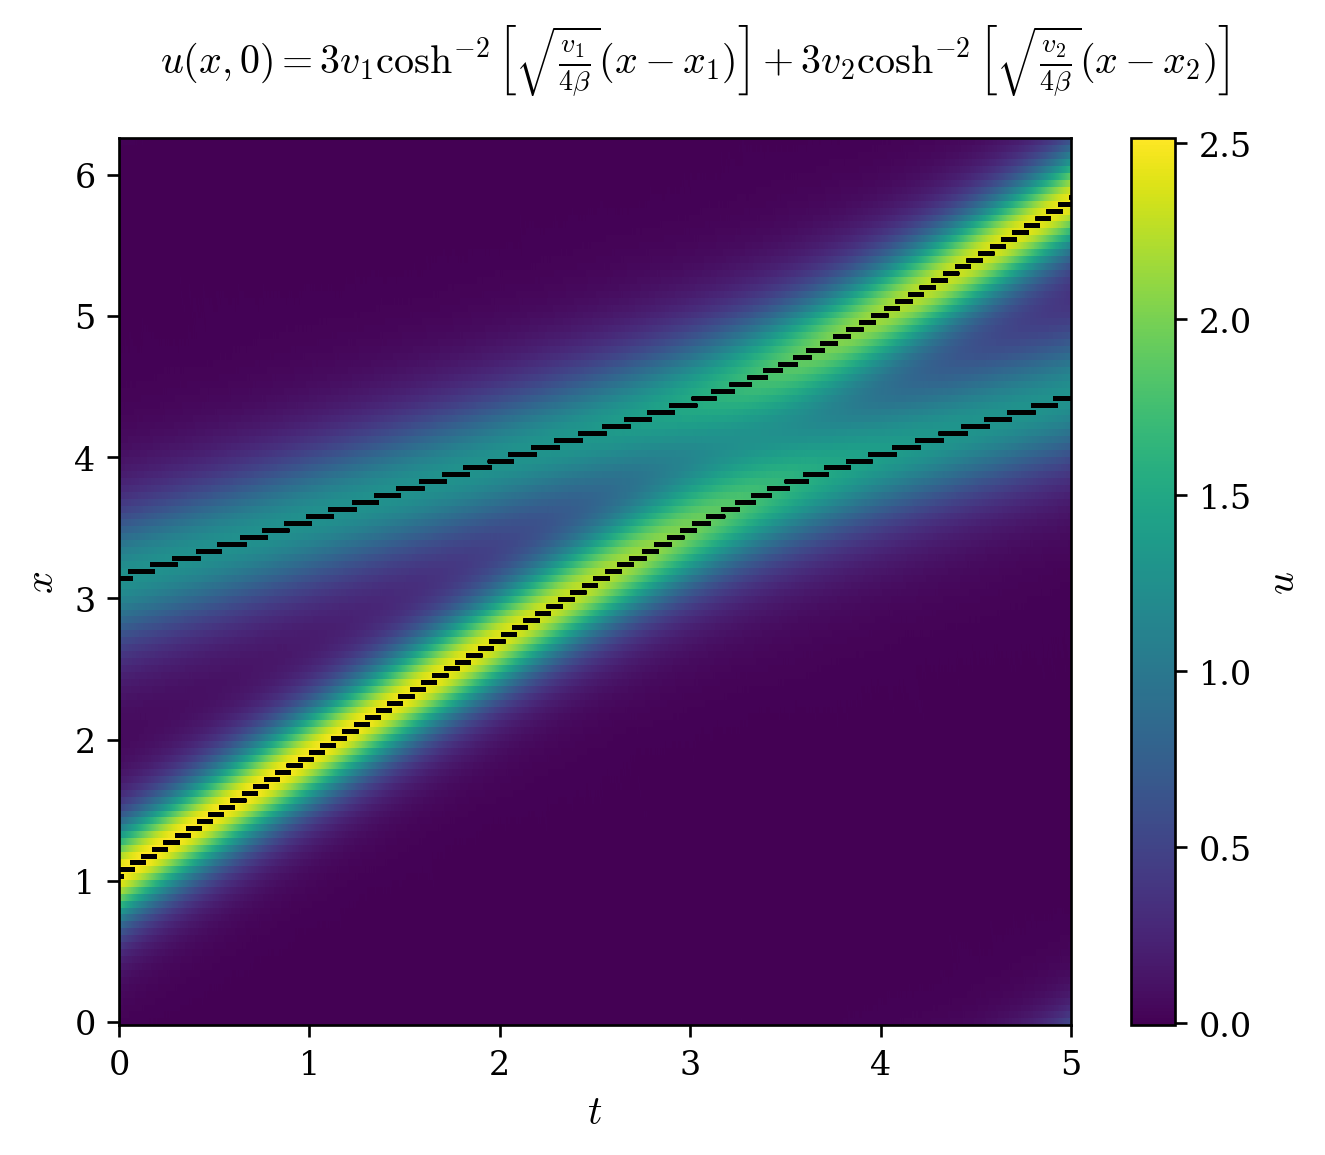

In [8]:
%matplotlib inline
tf = 5
L = 2 * np.pi
beta = 0.022
v1 = 0.5 * L / (1.5 * tf)
x1 = L/2
v2 = 2 * v1
x2 = L/6
x_vals, t_vals, u = kdv_pseudoespectral(
    lambda x: (
        3 * v1 * np.cosh(np.sqrt(v1 / (4 * beta)) * (x - x1))**(-2)
        + 3 * v2 * np.cosh(np.sqrt(v2 / (4 * beta)) * (x - x2))**(-2)
        ),
    beta=0.022,
    tf=tf,
    nx=128,
    L=L,
    dt=5e-5,
)
xx_vals, tt_vals = np.meshgrid(x_vals, t_vals, indexing='ij')
peaks_t, peaks_x = track_peaks(u, height=0.8)
plt.figure()
plt.suptitle(
    r"$u(x, 0) = 3 v_1 \cosh^{-2} \left[ \sqrt{\frac{v_1}{4 \beta}} (x - x_1) \right]"
    r"+ 3 v_2 \cosh^{-2} \left[ \sqrt{\frac{v_2}{4 \beta}} (x  - x_2) \right]$"
)
plt.pcolormesh(tt_vals, xx_vals, u, cmap="viridis")
plt.plot(peaks_t, peaks_x, 'k.', ms=1)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.colorbar(label="$u$")
plt.show()

En el segundo caso se consideraron velocidades tales que nuestro método no resuelve los máximos de ambos solitones a lo largo de toda la evolución. En particular se consideró la siguiente relación: $v_1 = \frac{v_2}{3}$. Es decir, había una mayor diferencia entre ambas velocidades.

Se puede observar que cuando se cruzan los solitones no se logran resolver ambos simultaneamente. Este caso resulta más ilustrativo al momento de pensar la interacción como un scattering de los solitones. En la figura se observa como si las trayectorias se desplazaran de la posición en la que hubieran evolucionado pero sin modificar su velocidad de propagación ni su amplitud.

Pasos de Pseudo-Espectral:   0%|          | 0/100000 [00:00<?, ?it/s]

Buscando Picos:   0%|          | 0/100001 [00:00<?, ?it/s]

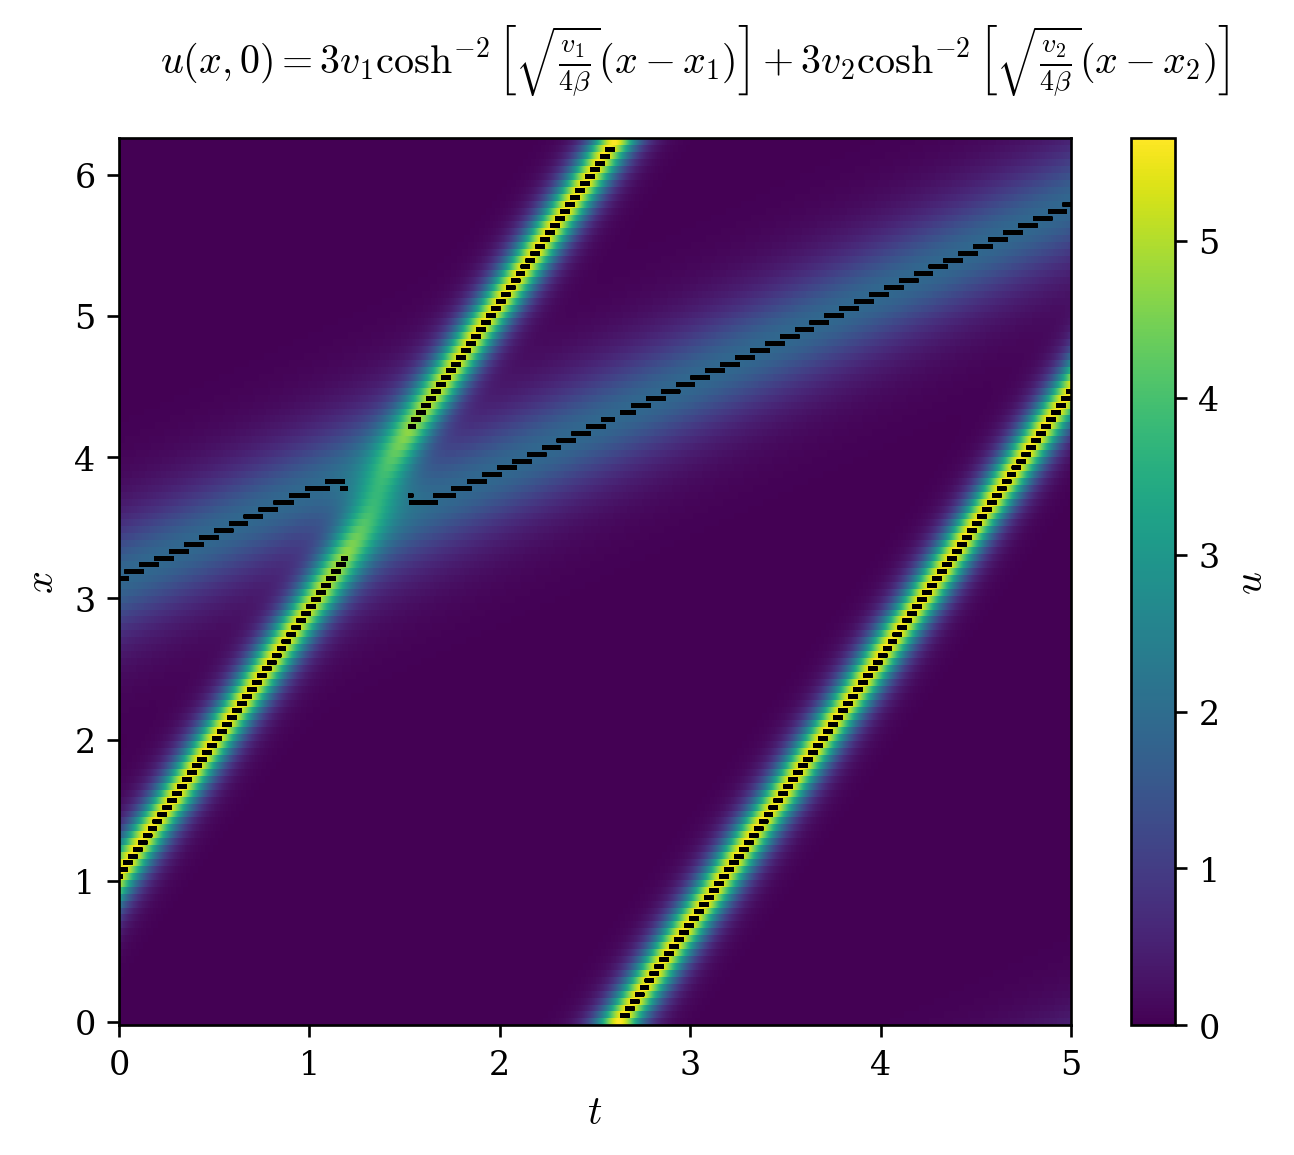

In [18]:
%matplotlib inline
tf = 5
L = 2 * np.pi
beta = 0.022
v1 = 0.5 * L / tf
x1 = L/2
v2 = 3 * v1
x2 = L/6
x_vals, t_vals, u = kdv_pseudoespectral(
    lambda x: (
        3 * v1 * np.cosh(np.sqrt(v1 / (4 * beta)) * (x - x1))**(-2)
        + 3 * v2 * np.cosh(np.sqrt(v2 / (4 * beta)) * (x - x2))**(-2)
        ),
    beta=0.022,
    tf=tf,
    nx=128,
    L=L,
    dt=5e-5,
)
xx_vals, tt_vals = np.meshgrid(x_vals, t_vals, indexing='ij')
peaks_t, peaks_x = track_peaks(u, height=0.8)
plt.figure()
plt.suptitle(
    r"$u(x, 0) = 3 v_1 \cosh^{-2} \left[ \sqrt{\frac{v_1}{4 \beta}} (x - x_1) \right]"
    r"+ 3 v_2 \cosh^{-2} \left[ \sqrt{\frac{v_2}{4 \beta}} (x  - x_2) \right]$"
)
plt.pcolormesh(tt_vals, xx_vals, u, cmap="viridis")
plt.plot(peaks_t, peaks_x, 'k.', ms=1)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.colorbar(label="$u$")
plt.show()

Estudiando rápidamente la conservación de la energía en el recinto para estos solitones podemos observar cómo en el intervalo de interacción esta tiene una caída abrupta.

En principio suponemos que esta puede deberse a la incapacidad de nuestra grilla de resolver correctamente la interacción entre los solitones.

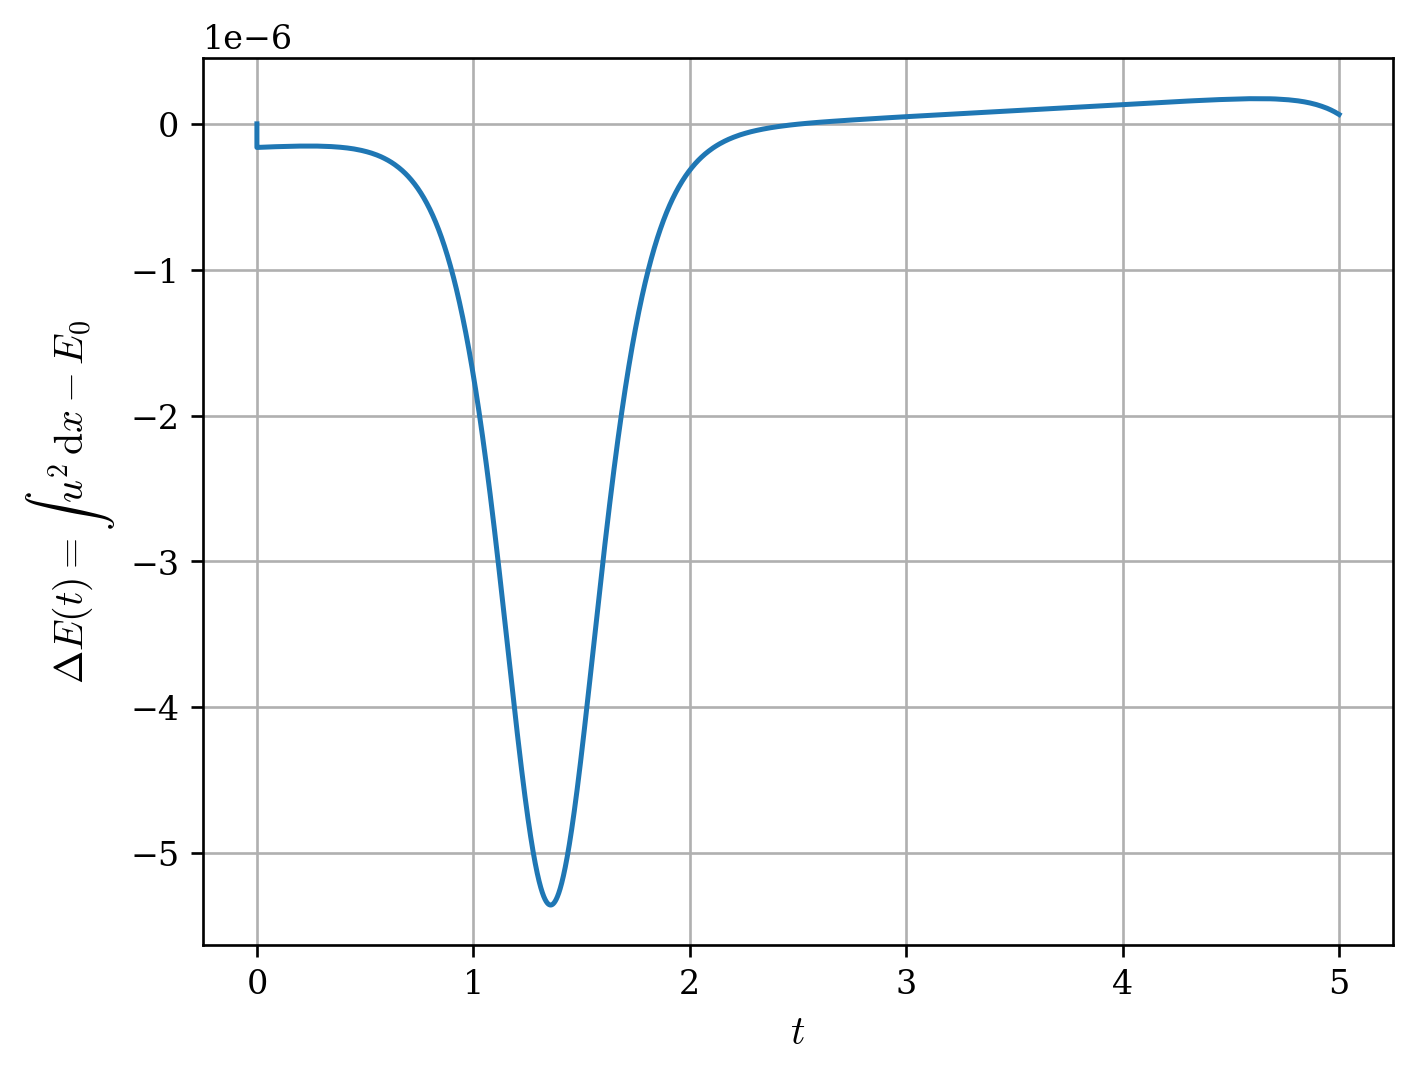

In [19]:
energia = np.sum(u**2, axis=0)
plt.plot(t_vals, energia - energia[0])
plt.grid()
plt.xlabel("$t$")
plt.ylabel(r"$\Delta E(t) = \int\, u^2\, \mathrm{d}x - E_0$")
plt.show()

In [15]:
plt.close("all")

## f)

Para este caso se propuso como condición inicial un $u (x,0) = sin(2x)$. Sabemos que en los mínimos del potencial dado por $V = \frac{-u}{6 \beta}$ habrá emisión de solitones. A continuación se graficó la evolución de $u(x,t)$ observando a izquierda la forma del potencial.

In [6]:
# Defino mis puntos en el espacio real y los modos para el espacio de Fourier
nx = 128
L = 2 * np.pi
beta = 0.022
# dt = (L/nx)**3 / beta  # Defino dt a partir de Courant–Friedrichs–Lewy:
dt = 5e-5
tf = 10. 

x_vals = np.linspace(0, L, nx, endpoint=False)  # Coordenada espacial en [0,2*pi]
t_vals = np.arange(0, tf + dt/2, dt)  # Tiempo
nt = t_vals.size
# Números de onda ordenados como en la FFT
k_vals = np.fft.rfftfreq(nx, d=(x_vals[1] - x_vals[0])) * 2 * np.pi

# Grilla para plot
x_grid, t_grid = np.meshgrid(x_vals, t_vals, indexing="xy")  # Grilla para graficar

In [7]:
u = np.empty([nx, nt])  # Array con la velocidad
# u[:, 0] = np.sin(2*x_vals) - np.cos(x_vals)
u[:, 0] = np.sin(2*x_vals)  # CI: senoidal pura
# u[:, 0] = np.cos(x_vals) + np.cos(8*x_vals) + np.sin(4*x_vals)  # CI: suma de armónicas
# u[:, 0] = np.exp(- (x_vals - L/2)**2 / 0.5**2)  # CI: gaussiana
# u[:, 0] = 0  # CI: constantemente cero

# Aplico el método de Euler para la integración temporal
for n in tqdm(range(nt - 1)):
    u[:, n+1] = evol(u[:, n], k_vals, beta, dt)

  0%|          | 0/200000 [00:00<?, ?it/s]

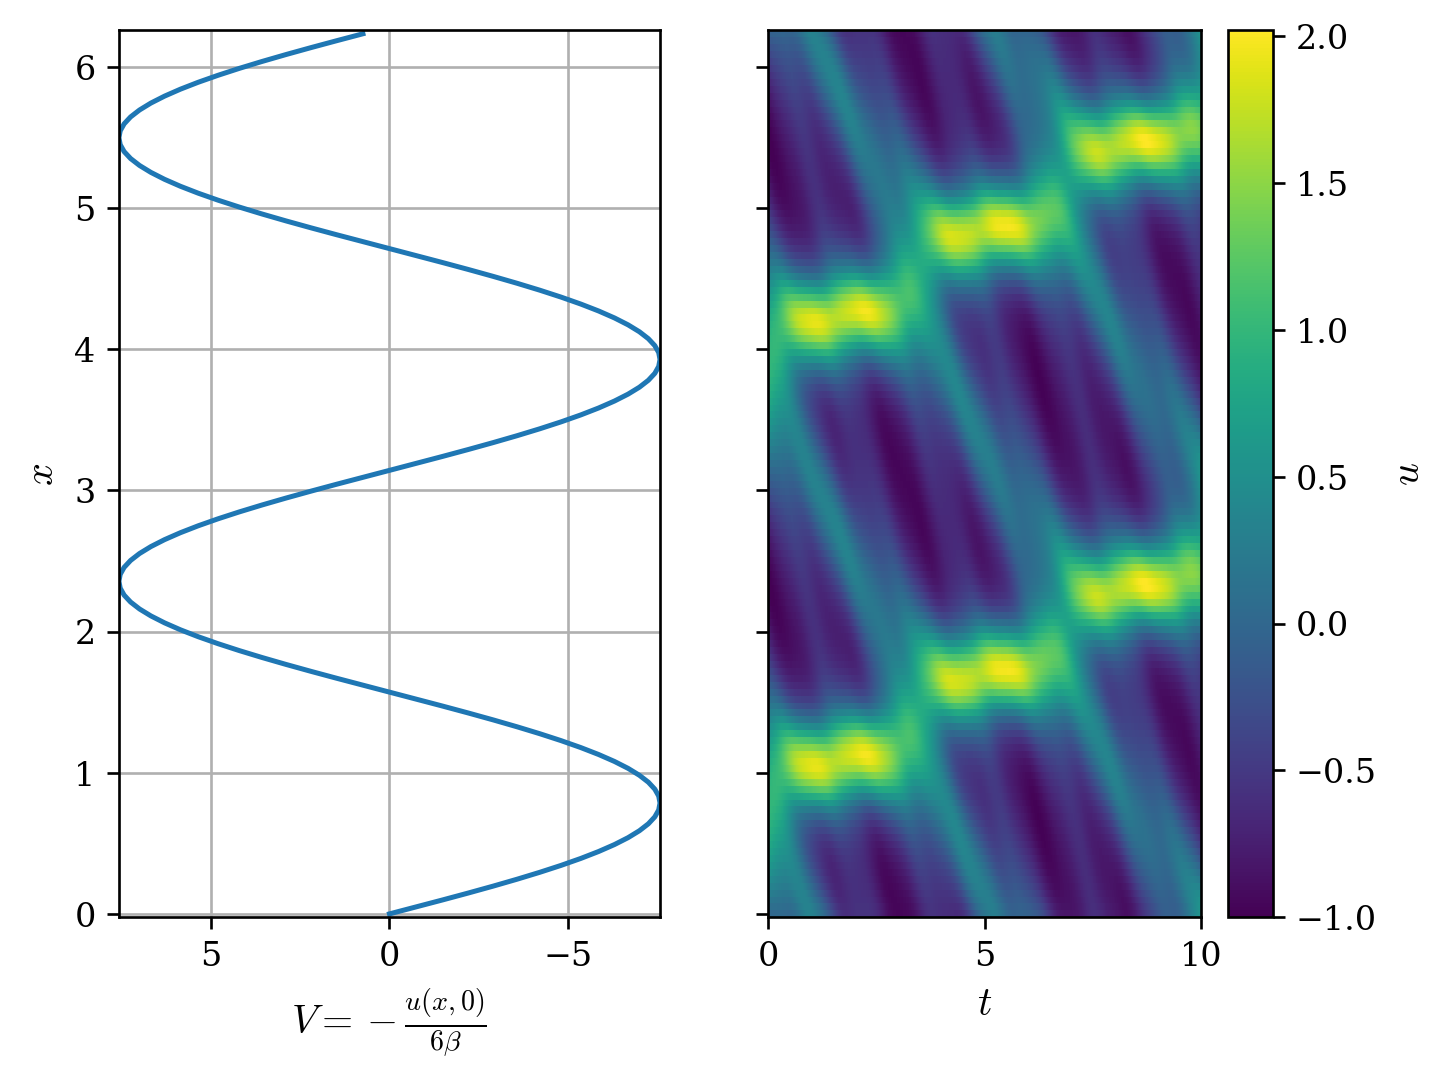

In [8]:
%matplotlib inline
fig, axs = plt.subplots(1, 2, sharey=True)
V = -u[:, 0]/(6*beta)
axs[0].plot(V, x_vals, label="CI")
axs[0].grid()
axs[0].set_ylabel("$x$")
axs[0].set_xlabel(r"$V = -\frac{u(x, 0)}{6\beta}$")
axs[0].set_xlim(V.max(), V.min())

scalarcolormap = axs[1].pcolormesh(t_grid, x_grid, u.T, shading="auto", cmap="viridis")
axs[1].set_xlabel("$t$")
# axs[1].set_ylabel("$x$")
plt.colorbar(scalarcolormap, label="$u$", ax=axs[1])
plt.show()

Se puede ver que efectivamente en las posiciones donde el potencial presenta valores mínimos hay una emisión de solitones. En este caso se emiten tanto con velocidades de propagación positivas, con una amplitud de $\sim 2$, y otros con velocidades de propagación negativas con amplitudes menores. 

A continuación se procedió a verificar la conservación global sobre el recinto de la energía y del momento. 

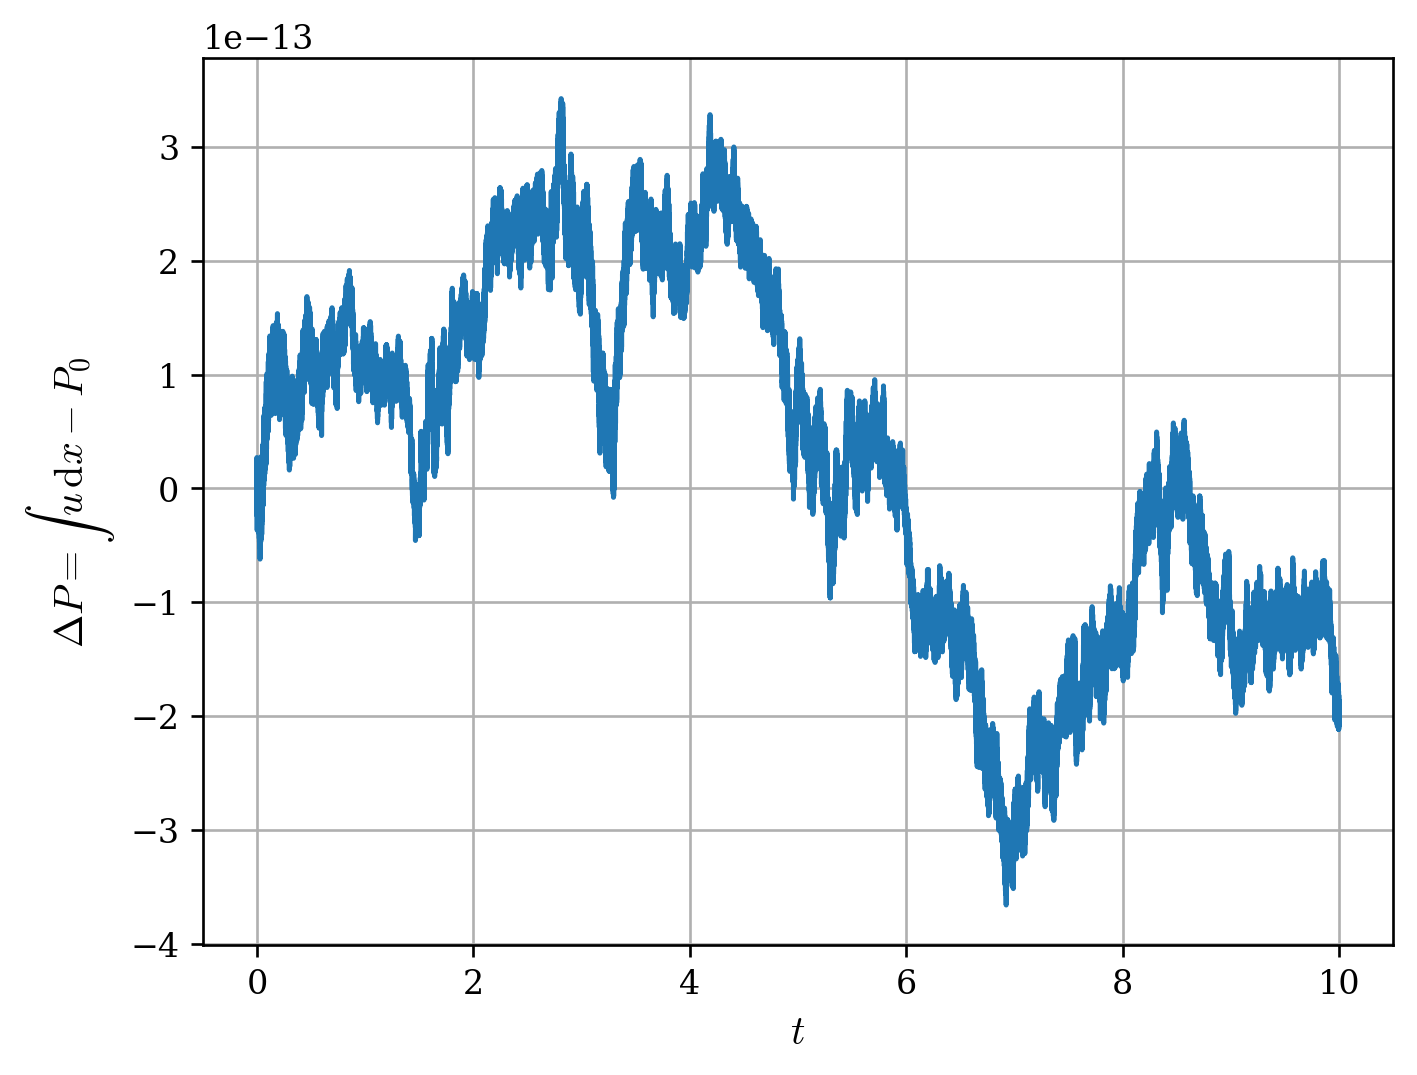

In [52]:
momento = np.sum(u, axis=0)
plt.plot(t_vals, momento)
plt.grid()
plt.xlabel("$t$")
plt.ylabel(r"$\Delta P = \int\, u\,\mathrm{d}x - P_0$")
plt.show()

Observando estas variaciones del orden de $10^{-13}$ podemos afirmar que se conserva el momento total en el recinto.

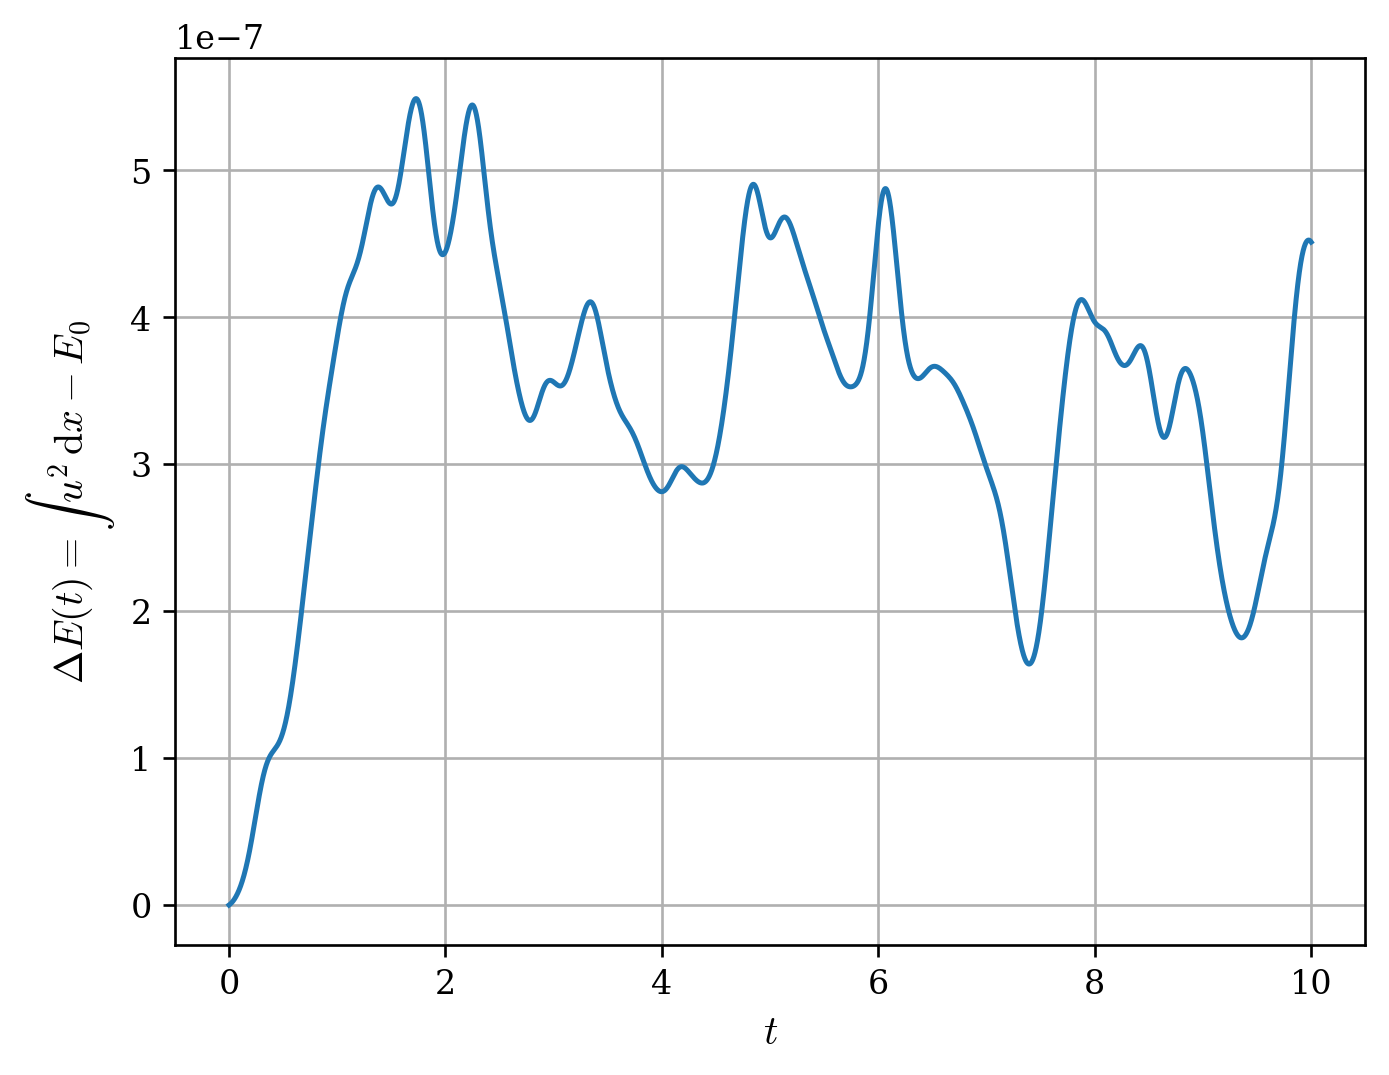

In [51]:
energia = np.sum(u**2, axis=0)
plt.plot(t_vals[0:], energia - energia[0])
plt.grid()
plt.xlabel("$t$")
plt.ylabel(r"$\Delta E(t) = \int\, u^2\, \mathrm{d}x - E_0$")
plt.show()

Y análogamente para la energía, con variaciones del orden de $10^{-7}$ podemos afirmar que se conserva la energía total en el recinto.